### Multiindex dan Pivot Tables 

    Berikut ini langkah-langkah melakukan multiindex dan pivot tabel di python. 

    Sumber : https://janakiev.com/blog/pandas-multiindex-pivot/

In [19]:
#memasukan modul yang digunakan 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import pandas as pd
import wbdata

In [20]:
#memasukan header dari data yaitu countries dan indicators
countries = ['ES', 'FR', 'DE', 'GB', 'IT']

indicators = {'SP.POP.TOTL':'Population', 
              'NY.GDP.PCAP.PP.CD':'GDP per capita',
              'NY.GNP.PCAP.PP.CD':'GNI per capita'}

In [21]:
#memasukan data
df = wbdata.get_dataframe(indicators=indicators, country=countries)
df.head()

GDP per capita  GNI per capita  Population
country date                                            
Germany 2018             NaN             NaN         NaN
        2017    52555.932637         53660.0  82685827.0
        2016    49921.330618         50910.0  82348669.0
        2015    47979.484203         49010.0  81686611.0
        2014    47190.769353         48110.0  80982500.0

In [22]:
#melihat informasi dari data yang belum diubah indexnya atau yang belum reset_index
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 295 entries, (Germany, 2018) to (Italy, 1960)
Data columns (total 3 columns):
GDP per capita    140 non-null float64
GNI per capita    140 non-null float64
Population        290 non-null float64
dtypes: float64(3)
memory usage: 8.1+ KB


In [23]:
#merubah index dengan reset_index
#merubah type date menjadi int
df.reset_index(inplace=True)
df['date'] = df['date'].astype(int)
df.head()

,country,date,GDP per capita,GNI per capita,Population
0,Germany,2018,NaN,NaN,NaN
1,Germany,2017,52555.932637,53660.0,82685827.0
2,Germany,2016,49921.330618,50910.0,82348669.0
3,Germany,2015,47979.484203,49010.0,81686611.0
4,Germany,2014,47190.769353,48110.0,80982500.0


In [24]:
#melihat hasil perubahan setelah reset_index
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 5 columns):
country           295 non-null object
date              295 non-null int32
GDP per capita    140 non-null float64
GNI per capita    140 non-null float64
Population        290 non-null float64
dtypes: float64(3), int32(1), object(1)
memory usage: 10.4+ KB


In [26]:
#melihat index data
#memeriksa apakah data memiliki multiindex atau tidak
df.index

RangeIndex(start=0, stop=295, step=1)

In [27]:
#merubah index seperti index awal dengan set_index
df.set_index(['country', 'date'], inplace=True)
df.head()

GDP per capita  GNI per capita  Population
country date                                            
Germany 2018             NaN             NaN         NaN
        2017    52555.932637         53660.0  82685827.0
        2016    49921.330618         50910.0  82348669.0
        2015    47979.484203         49010.0  81686611.0
        2014    47190.769353         48110.0  80982500.0

In [28]:
#memeriksa jenis index data
#dalam hal ini index datanya multiindex
df.index.summary()

'MultiIndex: 295 entries, (Germany, 2018) to (Italy, 1960)'

In [29]:
#melihat colom mana yang merupakan multiindex
#dalam hal ini adalah kolom country dan date
df.index.names

FrozenList(['country', 'date'])

In [30]:
#melihat isi dari kolom multiindex 
#dalam hal ini yang memiliki multiindex adalah negara Frace, Germany, dst
df.index.levels

FrozenList([['France', 'Germany', 'Italy', 'Spain', 'United Kingdom'], [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]])

#### Cara Mengakses Data Multiindex

In [31]:
#mengakses data yang multiindex untuk negara germany tahun 2000
df.loc['Germany', 2000]

GDP per capita    2.729811e+04
GNI per capita    2.712000e+04
Population        8.221151e+07
Name: (Germany, 2000), dtype: float64

In [32]:
#mengakses semua kolom dari kolom multiindex 
#dalam hal ini kolom negara germany untuk semua baris tahunnya
df_germany = df.loc['Germany']
df_germany.head()

,GDP per capita,GNI per capita,Population
date,,,
2018,NaN,NaN,NaN
2017,52555.932637,53660.0,82685827.0
2016,49921.330618,50910.0,82348669.0
2015,47979.484203,49010.0,81686611.0
2014,47190.769353,48110.0,80982500.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000224600E5940>],
      dtype=object)

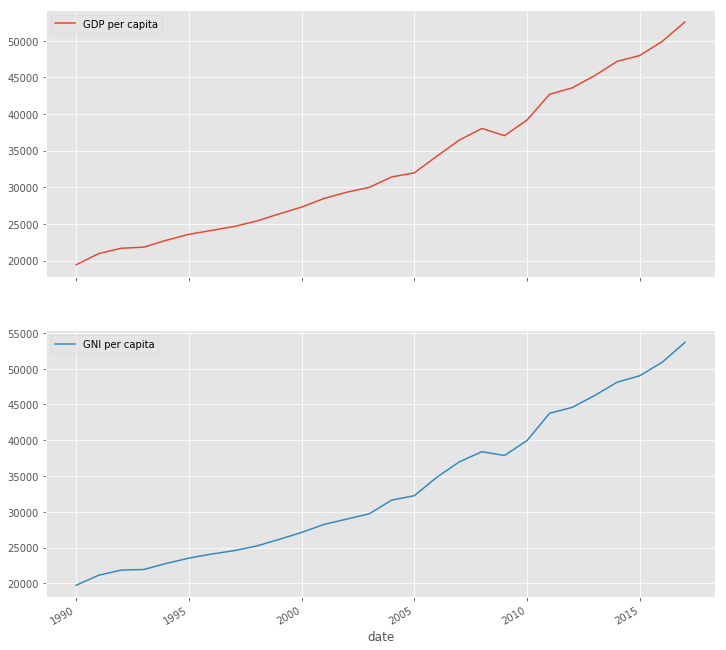

In [33]:
df_germany[['GDP per capita', 'GNI per capita']].plot(figsize=(12, 12), subplots=True, layout=(2, 1))

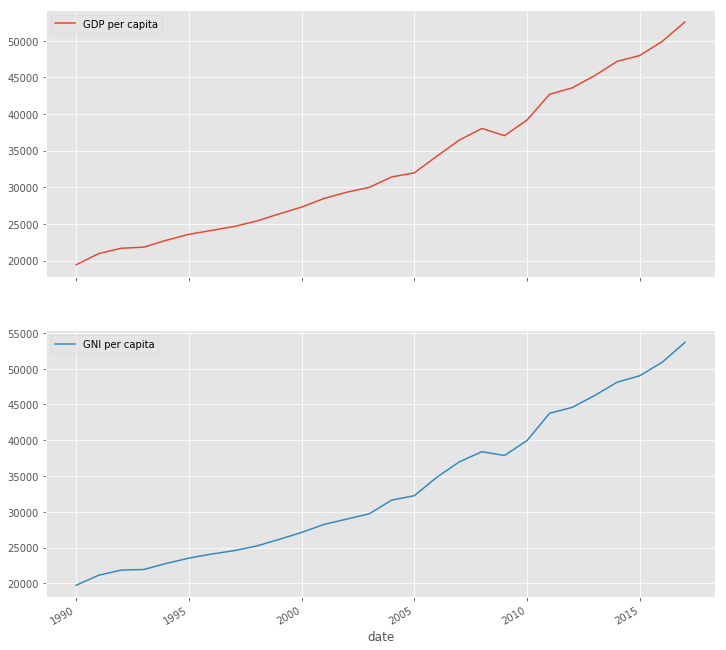

In [34]:
#menggambarkan plot GDP per capita dan GNI per capita
#tanda ; untuk menghilangkan informasi array 
df_germany[['GDP per capita', 'GNI per capita']].plot(figsize=(12, 12), subplots=True, layout=(2, 1));

In [35]:
#melakukan reset_index agar tidak multiindex
#membuat pivot tabel untuk 5 negara dari masing-masing tahun
df_pivot = df.reset_index()
df_pivot = df_pivot.pivot(index='date', columns='country', values='Population')
df_pivot.head()

country,France,Germany,Italy,Spain,United Kingdom
date,,,,,
1960,46814237.0,72814900.0,50199700.0,30455000.0,52400000.0
1961,47444751.0,73377632.0,50536350.0,30739250.0,52800000.0
1962,48119649.0,74025784.0,50879450.0,31023366.0,53250000.0
1963,48803680.0,74714353.0,51252000.0,31296651.0,53650000.0
1964,49449403.0,75318337.0,51675350.0,31609195.0,54000000.0


In [36]:
#bukti bahwa pivot tabel tidak menghasilkan multiindex
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1960 to 2018
Data columns (total 5 columns):
France            58 non-null float64
Germany           58 non-null float64
Italy             58 non-null float64
Spain             58 non-null float64
United Kingdom    58 non-null float64
dtypes: float64(5)
memory usage: 2.8 KB


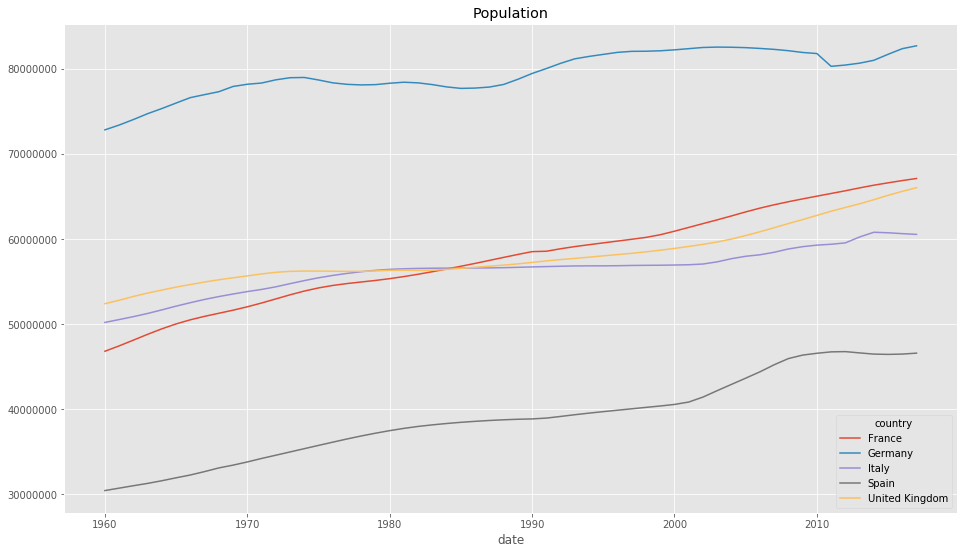

In [37]:
#memvisualisasikan pivot tabel
df_pivot.plot(figsize=(16, 9), title='Population');

# Show y-axis in 'plain' format instead of 'scientific'
# menampilkan sumbu y dalam format 'biasa' dan bukan 'ilmiah'
plt.ticklabel_format(style='plain', axis='y')

                        ## Semoga Bermanfaat
                        ## @Raspiani